In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#DataFrame
import pandas as pd

In [4]:
# Общий график для полносвяз модели: исх точность, после атак, после полносв автоенк, после сверточного автоенк

In [5]:
#до атаки. после атаки без авто, после атаки с авто, eps= 0,1

<Figure size 432x288 with 0 Axes>

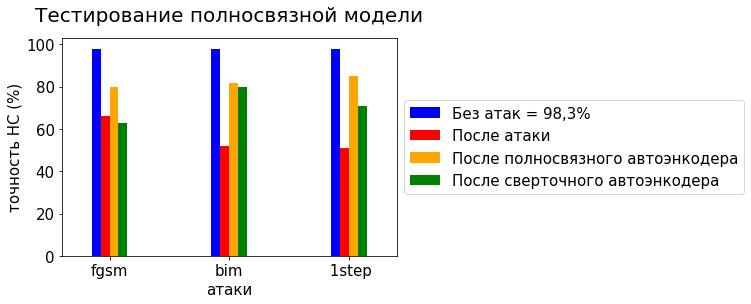

In [19]:
#EPSILON = 0.1
model_acc_d = [98, 98, 98]
after_attacks = [66, 52, 51]
dense_aut = [80, 82, 85]
conv_aut = [63, 80, 71]

index = ['fgsm', 'bim', ' 1step']


df_dense = pd.DataFrame({'Без атак = 98,3%' : model_acc_d,
                         'После атаки' :after_attacks,
                         'После полносвязного автоэнкодера' : dense_aut,
                         'После сверточного автоэнкодера' : conv_aut}, index=index)

plt.figure()
plt.rcParams.update({'font.size': 15})

ax = df_dense.plot.bar( color = {'Без атак = 98,3%':'blue', 'После атаки':'red', 'После полносвязного автоэнкодера':'orange', 'После сверточного автоэнкодера':'green'}, width=0.3)
plt.title('Тестирование полносвязной модели', fontsize=20, y=1.05)
plt.xlabel('атаки')
plt.xticks(rotation=360)
plt.ylabel('точность НС (%)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Тестирование полносвязной модели_РУС_EPS=0.1.png',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

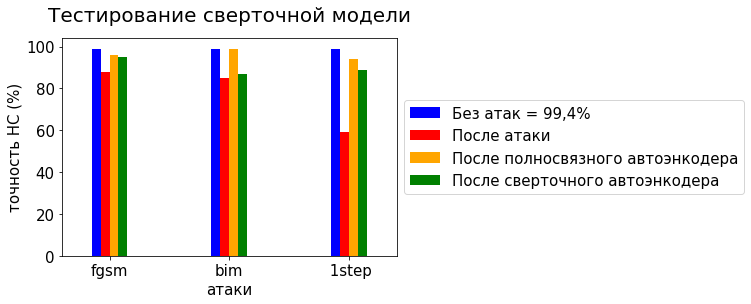

In [20]:
#EPSILON = 0.3
model_acc_d = [99, 99, 99]
after_attacks = [88, 85, 59]
dense_aut = [96, 99, 94]
conv_aut = [95, 87, 89]

index = ['fgsm', 'bim', ' 1step']

plt.figure()
plt.rcParams.update({'font.size': 15})
df_dense = pd.DataFrame({'Без атак = 99,4%' : model_acc_d,
                         'После атаки' :after_attacks,
                         'После полносвязного автоэнкодера' : dense_aut,
                         'После сверточного автоэнкодера' : conv_aut}, index=index)

ax = df_dense.plot.bar( color = {'Без атак = 99,4%':'blue', 'После атаки':'red', 'После полносвязного автоэнкодера':'orange', 'После сверточного автоэнкодера':'green'}, width=0.3)
plt.title('Тестирование сверточной модели', fontsize=20, y=1.05)
plt.xlabel('атаки')
plt.xticks(rotation=360)
plt.ylabel('точность НС (%)')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('Тестирование сверточной модели_РУС_EPS=0.1.png',bbox_inches='tight')

In [15]:
# eps = 0.1!
#default, fgsm, bim, onestepless,
model_acc_d = [0.98, 0.66,0.52, 0.51]

dense_aut = [0.81, 0.82, 0.79]
conv_aut = [0.68, 0.80, 0.71]

index_0 = ['без атак', 'fgsm', 'bim', '1step']
index = ['fgsm_aut', 'bim_aut', ' 1step_aut']


Text(0.5, 1.05, 'Точность модели после атаки OneStepLeastLikely до и после использования автоен-ов')

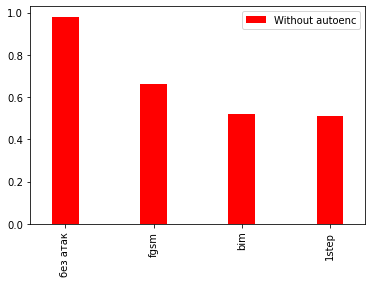

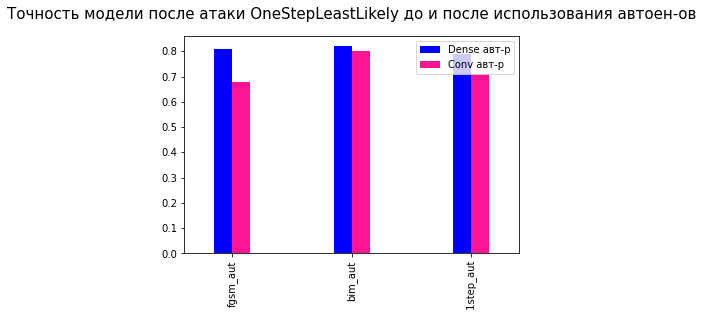

In [19]:
df_0 = pd.DataFrame({'Without autoenc':model_acc_d}, index=index_0)
ax = df_0.plot.bar(color={'Without autoenc':'red'}, width=0.3)

df = pd.DataFrame({'Dense авт-р' : dense_aut,
                  'Conv авт-р' : conv_aut}, index=index)

ax = df.plot.bar(color={'Dense авт-р':'blue' , 'Conv авт-р':'deeppink'}, width=0.3)
plt.title('Точность модели после атаки OneStepLeastLikely до и после использования автоен-ов', fontsize=15, y=1.05)
#plt.grid(color='gray', linewidth=0.7, axis='both', alpha=0.3)

#plt.savefig('_РУС.png',bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

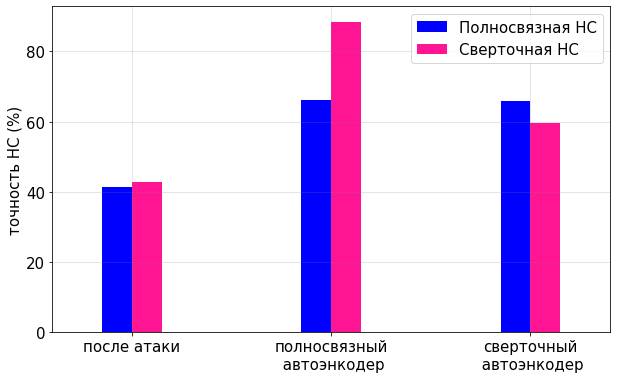

In [8]:
#RUSSIAN
#EPSILON = 0,4
dense_acc = [41.3, 66.0, 65.8]
conv_acc = [42.9, 88.4, 59.7]
index = ['после атаки', 'полносвязный\n автоэнкодер', 'сверточный\n автоэнкодер']

df = pd.DataFrame({'Полносвязная НС' : dense_acc,
                  'Сверточная НС' : conv_acc}, index=index)

plt.figure()
plt.rcParams.update({'font.size': 15})
ax = df.plot.bar(color={'Полносвязная НС':'blue' , 'Сверточная НС':'deeppink'}, width=0.3, figsize=(10,6))
#ax.set_fontsize(10)
#plt.title('Точность моделей после атаки OneStepLeastLikely до и после использования автоэнкодеровов', fontsize=20, y=1.05)

plt.xticks(rotation=360)
plt.ylabel('точность НС (%)')
plt.grid(color='gray', linewidth=0.7, axis='both', alpha=0.3)

plt.savefig('COMPARE_1st_DC_MODELS_2_РУС_EPS=0.4.png',bbox_inches='tight')

In [26]:
import visualkeras



In [29]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dropout

In [33]:
from tensorflow.keras.datasets import mnist
#os.environ['KERAS_HOME'] = os.path.join(os.getcwd(),'keras','datasets')
#mnist_path = os.path.join(os.getcwd(),'keras','datasets\mnist.npz')
#mnist_path

In [36]:
import numpy as np

In [37]:
(x_train_dense, y_train_dense), (x_test_dense, y_test_dense) = mnist.load_data()

x_train_dense = x_train_dense.astype('float32')/255.0
x_test_dense = x_test_dense.astype('float32')/255.0

x_train_dense = x_train_dense.reshape((len(x_train_dense), np.prod(x_train_dense.shape[1:])))
x_test_dense = x_test_dense.reshape((len(x_test_dense), np.prod(x_test_dense.shape[1:])))

input_shape_dense=x_train_dense[0].shape

In [38]:
input_shape_dense

(784,)

In [39]:
model_autoencoder_basic = Sequential([
    #encoder
    Dense(256, activation = 'relu', input_shape=input_shape_dense),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    
    #decoder
    Dense(128, activation = 'relu'),
    Dense(256, activation = 'relu'),
    Dense(28*28, activation = 'sigmoid')
])



In [64]:
model_autoencoder_basic.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 dense_5 (Dense)             (None, 784)               201488    
                                                                 
Total params: 484,944
Trainable params: 484,944
Non-trai

In [62]:
visualkeras.layered_view(model_autoencoder_basic).show() # display using your system viewer

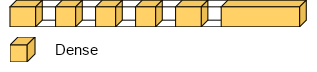

In [63]:
font = ImageFont.truetype("arial.ttf", 15)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model_autoencoder_basic, legend=True, font=font, spacing=20)

In [71]:
#Deafult dense model

In [72]:
input_imgs = Input(input_shape)
x=Flatten()(input_imgs)
x=Dense(512, activation='relu')(x)
x=Dropout(0.2)(x)

outputs=Dense(10, activation='softmax')(x)

In [74]:
model_2 = Model(inputs=input_imgs, outputs=outputs, name='mnist_default_model_dense_architecture')

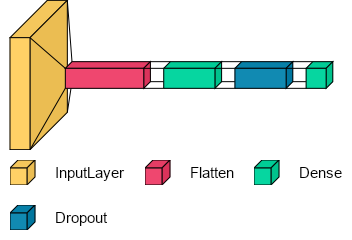

In [75]:
font = ImageFont.truetype("arial.ttf", 15)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model_2, legend=True, font=font, spacing=20, to_file = 'Dense Model.png')  # font is optional!

In [43]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [49]:
def preprocess_img(x):
   # x = (x.astype('float32')-data_mean)/data_std #or x.astype('float32')/255.0
    x = x.astype('float32')/255.0
    x= np.reshape(x, (len(x),28,28,1))
    return x

def preprocess_labels(y):
    return tf.one_hot(y.astype(np.int32), depth=10)

In [50]:
x_train = preprocess_img(x_train)
x_test = preprocess_img(x_test)
y_train = preprocess_labels(y_train)
y_test = preprocess_labels(y_test)


In [51]:
#AUTOENCODER

input_img = Input(shape=x_train[0].shape)

#Encoder
x=Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(input_img)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(16, (3,3), activation='relu', padding='same')(x)

encoded=MaxPooling2D((2,2), padding='same')(x)

#Decoder
x=Conv2D(8, (3,3), activation='relu', padding='same')(encoded)
x=UpSampling2D((2,2))(x)
x=Conv2D(16, (3,3), activation='relu', padding='same')(x)
x=UpSampling2D((2,2))(x)

decoded=Conv2D(1, (3,3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)

In [52]:
visualkeras.layered_view(autoencoder).show()

In [53]:
from PIL import ImageFont

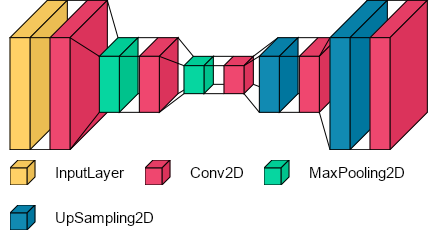

In [61]:
font = ImageFont.truetype("arial.ttf", 15)  # using comic sans is strictly prohibited!
visualkeras.layered_view(autoencoder, legend=True, font=font, spacing=20, to_file = 'Conv Autoencoder.png')  # font is optional!

In [68]:
#Default conv model
input_shape = (28,28,1)

In [69]:
input_imgs = Input(input_shape)
x=Conv2D(32,(3,3), activation='relu')(input_imgs)
x=MaxPooling2D()(x)
x=Dropout(0.4)(x)
x=Conv2D(64, (3,3), activation='relu')(x)
x=MaxPooling2D()(x)
x=Dropout(0.4)(x)
x=Flatten()(x)
x=Dense(128,activation='relu')(x)
x=Dropout(0.4)(x)

outputs=Dense(10, activation='softmax')(x)
model = Model(inputs=input_imgs, outputs=outputs, name='mnist_default_model')

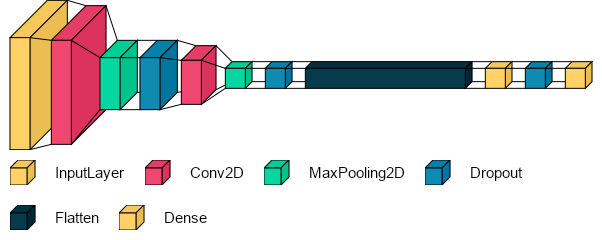

In [70]:
font = ImageFont.truetype("arial.ttf", 15)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font, spacing=20, to_file = 'Conv Model.png')  # font is optional!